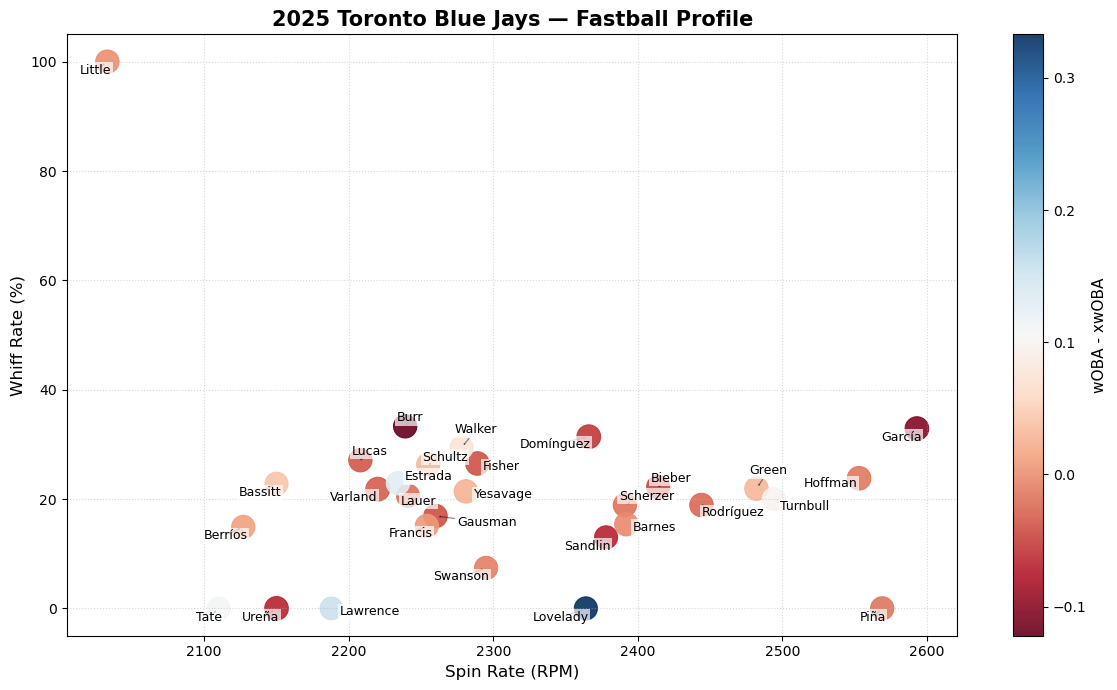

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

df = pd.read_csv("data/2025 Toronto spin rate.csv")

# last names only
df["last_name"] = df["player_name"].apply(lambda x: x.split(",")[0])

COL_SPIN = "spin_rate"
COL_WHIF = "swing_miss_percent"
COL_VELO = "velocity"
COL_DIFF = "wobadiff"
COL_LABEL = "last_name"

df = df.dropna(subset=[COL_SPIN, COL_WHIF, COL_VELO, COL_DIFF])

# % decimal
if df[COL_WHIF].max() > 1.5:
    df[COL_WHIF] /= 100.0

# scatter plot
plt.figure(figsize=(12, 7))

scatter = plt.scatter(
    df[COL_SPIN],
    df[COL_WHIF] * 100,
    s=df[COL_VELO] * 3,
    c=df[COL_DIFF],
    cmap=plt.colormaps["RdBu"],  # you can swap for another later if desired
    linewidth=0.8,
    alpha=0.9
)

plt.title("2025 Toronto Blue Jays — Fastball Profile", fontsize=15, weight="bold")
plt.xlabel("Spin Rate (RPM)", fontsize=12)
plt.ylabel("Whiff Rate (%)", fontsize=12)
plt.grid(True, linestyle=":", alpha=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label("wOBA - xwOBA", fontsize=11)


# label objects allowing adjustText to work
texts = []
for _, row in df.iterrows():
    texts.append(
        plt.text(
            row[COL_SPIN],
            row[COL_WHIF] * 100,
            row[COL_LABEL],
            fontsize=9,
            ha="center",
            va="center",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.2)
        )
    )

# prevent overlap

adjust_text(texts, arrowprops=dict(arrowstyle="->", alpha=0.4))

plt.tight_layout()
plt.show()


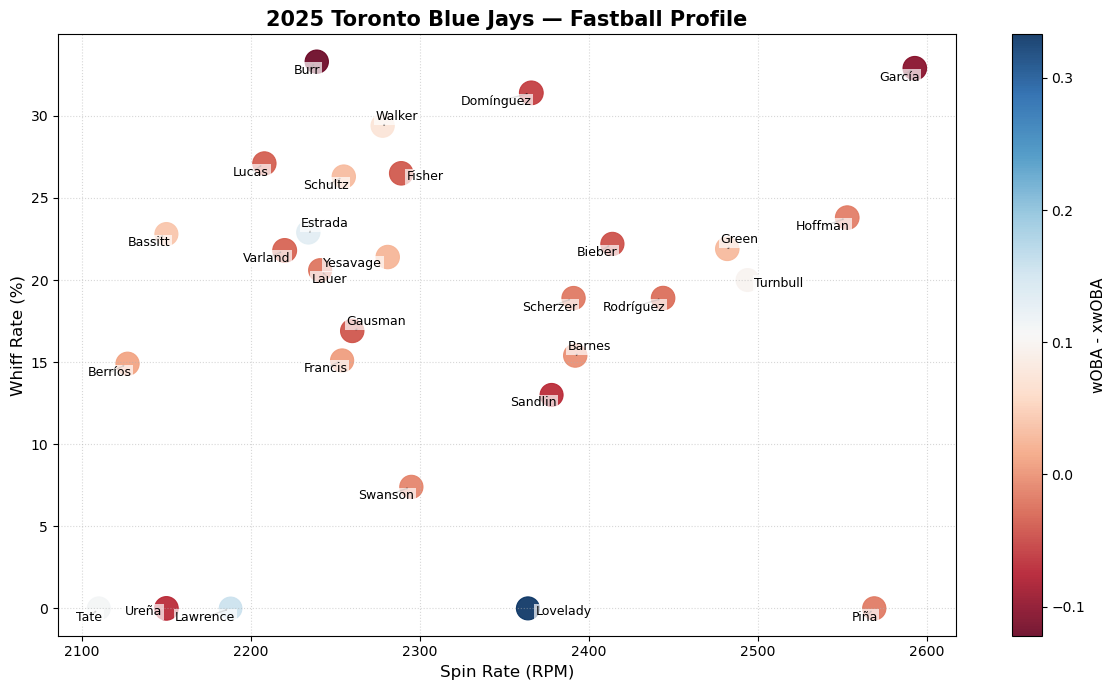

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text  # label repulsion helper

df = pd.read_csv("data/2025 Toronto spin rate.csv")

# remove B Little as an outlier
df = df[~df["player_name"].str.contains("Little", na=False)]

# last names only
df["last_name"] = df["player_name"].apply(lambda x: x.split(",")[0])

COL_SPIN = "spin_rate"
COL_WHIF = "swing_miss_percent"
COL_VELO = "velocity"
COL_DIFF = "wobadiff"
COL_LABEL = "last_name"

df = df.dropna(subset=[COL_SPIN, COL_WHIF, COL_VELO, COL_DIFF])

# % decimal
if df[COL_WHIF].max() > 1.5:
    df[COL_WHIF] /= 100.0

# scatter plot
plt.figure(figsize=(12, 7))

scatter = plt.scatter(
    df[COL_SPIN],
    df[COL_WHIF] * 100,
    s=df[COL_VELO] * 3,
    c=df[COL_DIFF],
    cmap=plt.colormaps["RdBu"],  # you can swap for another later if desired
    linewidth=0.8,
    alpha=0.9
)

plt.title("2025 Toronto Blue Jays — Fastball Profile", fontsize=15, weight="bold")
plt.xlabel("Spin Rate (RPM)", fontsize=12)
plt.ylabel("Whiff Rate (%)", fontsize=12)
plt.grid(True, linestyle=":", alpha=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label("wOBA - xwOBA", fontsize=11)


# label objects allowing adjustText to work
texts = []
for _, row in df.iterrows():
    texts.append(
        plt.text(
            row[COL_SPIN],
            row[COL_WHIF] * 100,
            row[COL_LABEL],
            fontsize=9,
            ha="center",
            va="center",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.2)
        )
    )

# prevent overlap

adjust_text(texts, arrowprops=dict(arrowstyle="->", alpha=0.4))

plt.tight_layout()
plt.show()
